In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import torch, torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms

torch.manual_seed(0)
np.random.seed(0)

In [3]:
mini_batch_size = 128
n_epochs = 1

In [23]:
df = pd.read_csv('doodle-detectives-aiclubiitm/train_images.csv')

In [5]:
from PIL import Image, ImageDraw
import numpy as np
import json

def vector_to_numpy(drawing, side=256):
    image = vector_to_image(drawing, side)
    image_array = np.array(image)
    return image_array

def vector_to_image(drawing, side=256):
    drawing = json.loads(drawing)
    min_x, min_y, max_x, max_y = calculate_bounding_box(drawing)

    # Calculate the offset to center the drawing within the canvas
    offset_x = (side - (max_x - min_x + 1)) // 2
    offset_y = (side - (max_y - min_y + 1)) // 2

    image = Image.new('L', (side, side), color='white')  # Create a white canvas
    draw = ImageDraw.Draw(image)

    for x, y in drawing:
        xy = [(x0 - min_x + offset_x, y0 - min_y + offset_y) for x0, y0 in zip(x, y)]
        draw.line(xy, fill='black', width=1)

    return image

def calculate_bounding_box(drawing):
    all_x = [x for x, _ in drawing]
    all_y = [y for _, y in drawing]

    min_x = min(min(x) for x in all_x)
    min_y = min(min(y) for y in all_y)
    max_x = max(max(x) for x in all_x)
    max_y = max(max(y) for y in all_y)

    return min_x, min_y, max_x, max_y

In [6]:
# df['drawing'] = df['drawing'].map(vector_to_numpy)

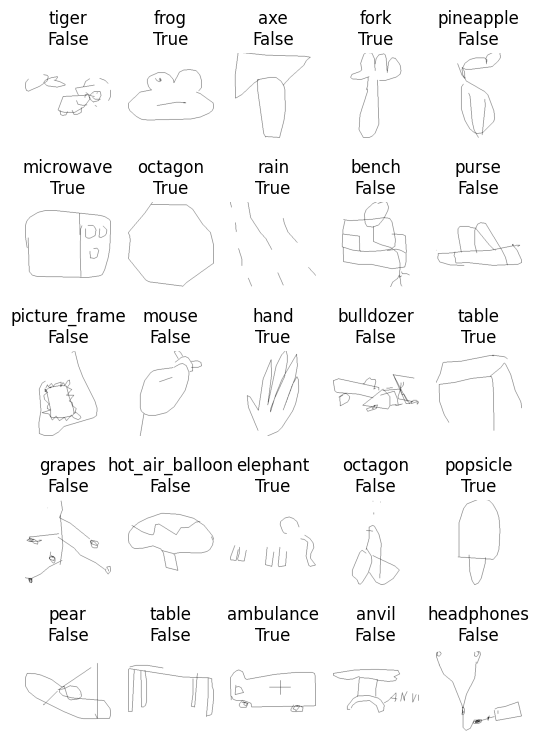

In [20]:
img_indices = np.array([np.random.randint(0, len(df)) for i in range(25)]) # An array of random integers
fig, axes = plt.subplots(5, 5)
# A plot with 5 subplots
for n, i in enumerate(img_indices):
    axes[n//5, n%5].set_title(f"{df.loc[i]['word']}\n{df.loc[i]['recognized']}")
    # // is integer division. This gets us the data in rows and columns of the graph
    # print(type(df.loc[i]['drawing']))
    img = df.loc[i]['drawing']
    axes[n//5, n%5].axis('off') # No need for z and y axes
    axes[n//5, n%5].imshow(img, cmap='gray') # Syntax for plotting images in numpy
plt.subplots_adjust(bottom=0, top=1.5)

In [22]:
# df.to_csv('doodle-detectives-aiclubiitm/train_images.csv')

In [19]:
df['word'].unique()

array(['fish', 'potato', 'flamingo', 'bulldozer', 'mailbox', 'table',
       'tent', 'telephone', 'bench', 'lightning', 'axe', 'paper_clip',
       'donut', 'dog', 'leg', 'brain', 'book', 'mermaid', 'eye',
       'fire_hydrant', 'zigzag', 'bird', 'ear', 'mountain', 'line',
       'television', 'piano', 'diving_board', 'keyboard', 'helmet',
       't-shirt', 'bed', 'laptop', 'hamburger', 'hockey_stick',
       'triangle', 'ladder', 'wine_bottle', 'pencil', 'pillow', 'bridge',
       'envelope', 'snail', 'pineapple', 'eraser', 'fork', 'owl',
       'helicopter', 'hammer', 'leaf', 'bread', 'door', 'river',
       'remote_control', 'nail', 'flip_flops', 'toaster', 'lipstick',
       'watermelon', 'mouse', 'teddy-bear', 'garden_hose', 'lollipop',
       'pig', 'purse', 'pear', 'headphones', 'mushroom', 'hexagon',
       'truck', 'guitar', 'popsicle', 'fireplace', 'whale', 'apple',
       'pizza', 'tiger', 'grapes', 'octagon', 'hot_air_balloon',
       'hot_dog', 'ambulance', 'rainbow', 'anv